In [1]:
import requests
import pandas as pd
from io import StringIO

# URLs of the data files
airport_data_url = "https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat"
routes_data_url = "https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat"

# Download airport data
response_airport = requests.get(airport_data_url)
if response_airport.status_code == 200:
    # Convert content to DataFrame and save as CSV
    airport_col = ['ID', 'Name', 'City', 'Country', 'IATA', 'ICAO', 'Lat', 'Long', 'Alt',
                   'Timezone', 'DST', 'Tz database time zone', 'type', 'source']
    airport_df = pd.read_csv(StringIO(response_airport.text), names=airport_col)
    airport_df.to_csv("airports.csv", index=False)
    print("Airport data downloaded and saved as CSV successfully.")
else:
    print("Failed to download airport data.")

# Download routes data
response_routes = requests.get(routes_data_url)
if response_routes.status_code == 200:
    # Convert content to DataFrame and save as CSV
    route_cols = ['Airline', 'Airline ID', 'Source Airport', 'Source Airport ID',
                  'Dest Airport', 'Dest Airport ID', 'Codeshare', 'Stops', 'equipment']
    routes_df = pd.read_csv(StringIO(response_routes.text), names=route_cols)
    routes_df.to_csv("routes.csv", index=False)
    print("Routes data downloaded and saved as CSV successfully.")
else:
    print("Failed to download routes data.")

Airport data downloaded and saved as CSV successfully.
Routes data downloaded and saved as CSV successfully.


In [2]:
import pandas as pd

# Function to count rows excluding headers in a CSV file
def count_rows(csv_file, entity_name):
    try:
        df = pd.read_csv(csv_file, header=None, dtype={7: str})  # Read CSV without header
        row_count = len(df)  # Return the number of rows
        print(f"Number of {entity_name} in {csv_file}: {row_count}")
    except FileNotFoundError:
        print(f"File not found: {csv_file}")
    except pd.errors.EmptyDataError:
        print(f"{csv_file} is empty.")
    except pd.errors.ParserError:
        print(f"Error parsing {csv_file}.")

# List of CSV files and corresponding entity names
csv_files_and_entities = [("airports.csv", "airports"), ("routes.csv", "routes")]

for csv_file, entity_name in csv_files_and_entities:
    count_rows(csv_file, entity_name)


Number of airports in airports.csv: 7699
Number of routes in routes.csv: 67664


In [3]:
!pip install cartopy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 22.1 MB/s eta 0:00:00


As there are invalid airports, we need to clean up the data.

Total Airports: 7698
Total Routes: 67663
Total Edges: 37595


KeyError: 'AER'

/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_1_states_provinces_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


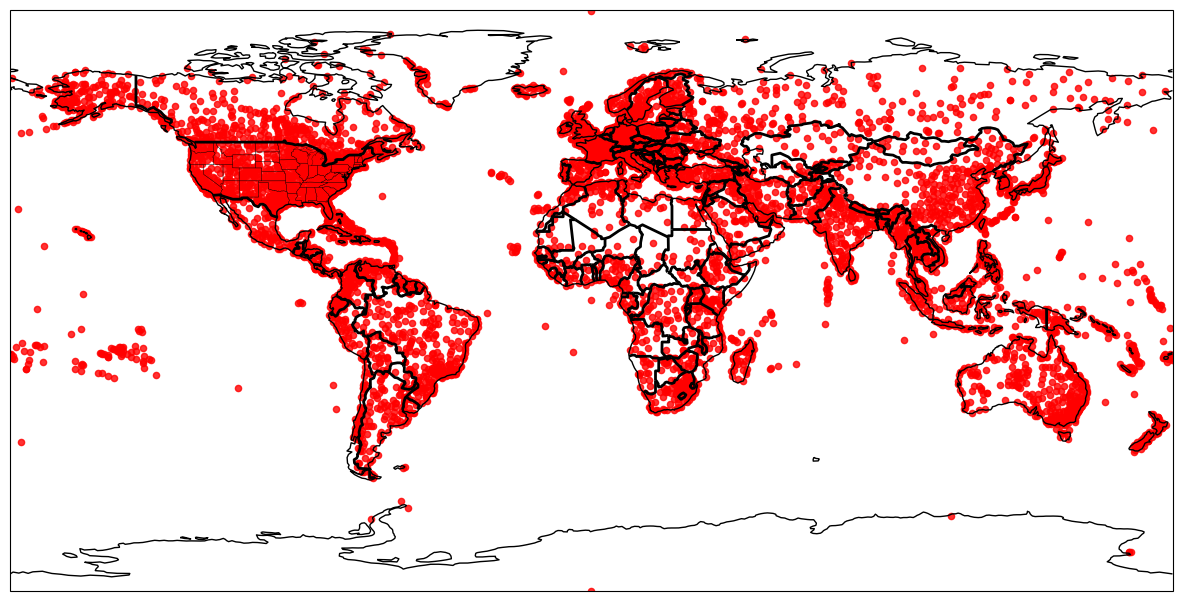

In [4]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

def load_routes_data(file_path):
    route_cols = ['Airline', 'Airline ID', 'Source Airport', 'Source Airport ID',
                  'Dest Airport', 'Dest Airport ID', 'Codeshare', 'Stops', 'Equipment']
    return pd.read_csv(file_path, names=route_cols)

def load_airports_data(file_path):
    airport_cols = ['ID', 'Name', 'City', 'Country', 'IATA', 'ICAO', 'Lat', 'Long', 'Altitude',
                     'Timezone', 'DST', 'Tz database time zone', 'Type', 'Source']
    return pd.read_csv(file_path, names=airport_cols, index_col=0)

def visualize_routes(routes_df, airport_df):
    # Create a directed graph
    graph = nx.from_pandas_edgelist(routes_df, source='Source Airport', target='Dest Airport',
                                    edge_attr=True, create_using=nx.DiGraph())

    # Get positions for all airports
    pos_data = airport_df[['Long', 'Lat']].to_dict(orient='index')

    # Count the total number of airports, routes, and edges
    total_airports = len(airport_df)
    total_routes = len(routes_df)
    total_edges = len(graph.edges())

    print(f"Total Airports: {total_airports}")
    print(f"Total Routes: {total_routes}")
    print(f"Total Edges: {total_edges}")

    # Plot the graph using Cartopy
    plt.figure(figsize=(15, 20))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.add_feature(cfeature.BORDERS, linewidth=2)
    ax.add_feature(cfeature.COASTLINE, linewidth=1)
    ax.add_feature(cfeature.STATES, linewidth=0.2)

    # Scatter plot airports
    ax.scatter(airport_df['Long'], airport_df['Lat'], s=20, c='r', alpha=0.8, label='Airports')

    # Draw all edges on the map
    all_edges = [(edge[0], edge[1]) for edge in graph.edges()]
    nx.draw_networkx_edges(
    G=graph,
    pos=pos_data,
    edgelist=all_edges,
    edge_color='g',
    width=[0.5 * w for w in routes_df['Stops']],
    alpha=0.06,
    arrows=False
)


    ax.legend(loc='upper right', fontsize='xx-large')
    plt.title("Network graph of flight routes", fontsize=30)

    plt.show()

if __name__ == "__main__":
    # Load data
    airports_file_path = "https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat"
    routes_file_path = "https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat"

    routes_df = load_routes_data(routes_file_path)
    airport_df = load_airports_data(airports_file_path)

    # Visualize all routes
    visualize_routes(routes_df, airport_df)

exluding airports not in the routes

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

def load_routes_data(file_path):
    route_cols = ['Airline', 'Airline ID', 'Source Airport', 'Source Airport ID',
                  'Dest Airport', 'Dest Airport ID', 'Codeshare', 'Stops', 'Equipment']
    return pd.read_csv(file_path, names=route_cols)

def load_airports_data(file_path):
    airport_cols = ['ID', 'Name', 'City', 'Country', 'IATA', 'ICAO', 'Lat', 'Long', 'Altitude',
                     'Timezone', 'DST', 'Tz database time zone', 'Type', 'Source']
    return pd.read_csv(file_path, names=airport_cols, index_col=0)

def visualize_routes(routes_df, airport_df):
    # Filter out rows with missing or invalid IATA codes in both datasets
    valid_airports = set(airport_df['IATA'])
    valid_routes_airports = set(routes_df[['Source Airport', 'Dest Airport']].stack().unique())

    valid_airports = valid_airports.intersection(valid_routes_airports)

    airport_df = airport_df[airport_df['IATA'].isin(valid_airports)]
    routes_df = routes_df[
        (routes_df['Source Airport'].isin(valid_airports)) &
        (routes_df['Dest Airport'].isin(valid_airports))
    ]

    # Create a directed graph
    graph = nx.from_pandas_edgelist(routes_df, source='Source Airport', target='Dest Airport',
                                    edge_attr=True, create_using=nx.DiGraph())

    # Get positions for valid airports
    pos_data = airport_df[['Long', 'Lat']].to_dict(orient='index')

    # Count the total number of airports, routes, and edges
    total_airports = len(valid_airports)
    total_routes = len(routes_df)
    total_edges = len(graph.edges())

    print(f"Total Valid Airports: {total_airports}")
    print(f"Total Routes: {total_routes}")
    print(f"Total Edges: {total_edges}")

    # Plot the graph using Cartopy
    plt.figure(figsize=(15, 20))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.add_feature(cfeature.BORDERS, linewidth=2)
    ax.add_feature(cfeature.COASTLINE, linewidth=1)
    ax.add_feature(cfeature.STATES, linewidth=0.2)

    # Scatter plot airports
    ax.scatter(airport_df['Long'], airport_df['Lat'], s=20, c='r', alpha=0.8, label='Airports')

    # Draw edges on the map for valid airports
    valid_edges = [(edge[0], edge[1]) for edge in graph.edges() if edge[0] in pos_data and edge[1] in pos_data]
    nx.draw_networkx_edges(G=graph, pos=pos_data, edgelist=valid_edges,
                           edge_color='g', width=[0.5 * w for w in routes_df['Stops']], alpha=0.06, arrows=False)

    ax.legend(loc='upper right', fontsize='xx-large')
    plt.title("Network graph of flight routes", fontsize=30)

    plt.show()

if __name__ == "__main__":
    # Load data
    airports_file_path = "https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat"
    routes_file_path = "https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat"

    routes_df = load_routes_data(routes_file_path)
    airport_df = load_airports_data(airports_file_path)

    # Visualize routes with only valid airports and routes
    visualize_routes(routes_df, airport_df)

Reduce the above step specifcally to United States

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

def load_routes_data(file_path):
    route_cols = ['Airline', 'Airline ID', 'Source Airport', 'Source Airport ID',
                  'Dest Airport', 'Dest Airport ID', 'Codeshare', 'Stops', 'Equipment']
    return pd.read_csv(file_path, names=route_cols)

def load_airports_data(file_path):
    airport_cols = ['ID', 'Name', 'City', 'Country', 'IATA', 'ICAO', 'Lat', 'Long', 'Altitude',
                     'Timezone', 'DST', 'Tz database time zone', 'Type', 'Source']
    return pd.read_csv(file_path, names=airport_cols, index_col=0)

def visualize_routes(routes_df, airport_df, country_filter=None):
    # Filter out airports that are not present in airport_df
    valid_airports = set(airport_df['IATA'])
    routes_df = routes_df[(routes_df['Source Airport'].isin(valid_airports)) &
                          (routes_df['Dest Airport'].isin(valid_airports))]

    # Apply additional country filter if specified
    if country_filter:
        valid_airports = set(airport_df[(airport_df['Country'] == country_filter) & (airport_df['IATA'].isin(valid_airports))]['IATA'])
        routes_df = routes_df[(routes_df['Source Airport'].isin(valid_airports)) &
                              (routes_df['Dest Airport'].isin(valid_airports))]

    # Create a directed graph
    graph = nx.from_pandas_edgelist(routes_df, source='Source Airport', target='Dest Airport',
                                    edge_attr=True, create_using=nx.DiGraph())

    # Get positions for valid airports
    pos_data = airport_df[airport_df['IATA'].isin(valid_airports)][['Long', 'Lat']].to_dict(orient='index')

    # Collect edges involving airports not present in airport_df
    invalid_edges = [(edge[0], edge[1]) for edge in graph.edges() if edge[0] not in pos_data or edge[1] not in pos_data]

    # Count the total number of airports, routes, and edges
    total_airports = len(valid_airports)
    total_routes = len(routes_df)
    total_edges = len(graph.edges())

    print(f"Total Valid Airports: {total_airports}")
    print(f"Total Routes: {total_routes}")
    print(f"Total Edges: {total_edges}")

    # Plot the graph using Cartopy
    plt.figure(figsize=(15, 20))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.add_feature(cfeature.BORDERS, linewidth=2)
    ax.add_feature(cfeature.COASTLINE, linewidth=1)
    ax.add_feature(cfeature.STATES, linewidth=0.2)

    # Scatter plot airports
    ax.scatter(airport_df['Long'], airport_df['Lat'], s=20, c='r', alpha=0.8, label='Airports')

    # Draw edges on the map for valid airports
    valid_edges = [(edge[0], edge[1]) for edge in graph.edges() if edge[0] in pos_data and edge[1] in pos_data]
    nx.draw_networkx_edges(G=graph, pos=pos_data, edgelist=valid_edges,
                           edge_color='g', width=[0.5 * w for w in routes_df['Stops']], alpha=0.06, arrows=False)

    ax.legend(loc='upper right', fontsize='xx-large')
    plt.title("Network graph of flight routes", fontsize=30)

    plt.show()

    # Save the edges involving airports not present in airport_df
    invalid_edges_df = pd.DataFrame(invalid_edges, columns=['Source Airport', 'Dest Airport'])
    invalid_edges_df.to_csv("invalid_edges.csv", index=False)

if __name__ == "__main__":
    # Load data
    airports_file_path = "https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat"
    routes_file_path = "https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat"

    routes_df = load_routes_data(routes_file_path)
    airport_df = load_airports_data(airports_file_path)

    # Visualize routes with a filter for the United States
    visualize_routes(routes_df, airport_df, country_filter='United States')

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load airport data
airport_col = ['ID', 'Name', 'City', 'Country', 'IATA', 'ICAO', 'Lat', 'Long', 'Alt',
               'Timezone', 'DST', 'Tz database time zone', 'type', 'source']
# airport_df = pd.read_csv("airports.csv")
airport_df = pd.read_csv("https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat",
                         names=airport_col, index_col=0)

# Load routes data
route_cols = ['Airline', 'Airline ID', 'Source Airport', 'Source Airport ID',
              'Dest Airport', 'Dest Airport ID', 'Codeshare', 'Stops', 'equipment']
# routes_df = pd.read_csv("routes.csv")
routes_df = pd.read_csv("https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat",
                        names=route_cols)

# Count the number of uncleaned airports and routes
uncleaned_airports_count = len(airport_df)
uncleaned_routes_count = len(routes_df)

# Clean up data
routes_df['Source Airport ID'] = pd.to_numeric(routes_df['Source Airport ID'].astype(str), errors='coerce')
routes_df['Dest Airport ID'] = pd.to_numeric(routes_df['Dest Airport ID'].astype(str), errors='coerce')
routes_df = routes_df.dropna(subset=["Source Airport ID", "Dest Airport ID"])

# Count the number of cleaned airports and routes
cleaned_airports_count = len(airport_df)
cleaned_routes_count = len(routes_df)

# Display counts of uncleaned and cleaned airports and routes
print(f"Uncleaned Airports Count: {uncleaned_airports_count}")
print(f"Cleaned Airports Count: {cleaned_airports_count}")
print(f"Uncleaned Routes Count: {uncleaned_routes_count}")
print(f"Cleaned Routes Count: {cleaned_routes_count}")

# Simple network visualization
airport_us = airport_df[(airport_df.Country == "United States")][['Name', 'Lat', 'Long', 'IATA', 'ICAO']]
us_airport_ix = airport_us.index.values
routes_us = routes_df[(routes_df['Source Airport ID'].isin(us_airport_ix)) &
                     (routes_df['Dest Airport ID'].isin(us_airport_ix))]  # Extract routes within the USA
routes_us = pd.DataFrame(routes_us.groupby(['Source Airport', 'Dest Airport']).size().reset_index(name='counts'))

counts = pd.concat([routes_us['Source Airport'], routes_us.loc[routes_us['Source Airport'] != routes_us['Dest Airport'], 'Dest Airport']]).value_counts()
counts = pd.DataFrame({'IATA': counts.index, 'total_flight': counts})
pos_data = counts.merge(airport_us, on='IATA')

# Create a directed graph
graph = nx.from_pandas_edgelist(routes_us, source='Source Airport', target='Dest Airport',
                                edge_attr='counts', create_using=nx.DiGraph())

# Plot the graph using Cartopy
plt.figure(figsize=(10, 9))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.BORDERS, linewidth=2)
ax.add_feature(cfeature.COASTLINE, linewidth=2)
ax.add_feature(cfeature.STATES, linewidth=0.2)

# Position airports on the map
ax.scatter(pos_data['Long'], pos_data['Lat'], s=50, c='r', alpha=0.8)

plt.show()

# Export cleaned airport data to a CSV file
airport_df.to_csv("US_cleaned_airports.csv")

# Export cleaned routes data to a CSV file
routes_df.to_csv("US_cleaned_routes.csv")


More refined airports of United states

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load cleaned airport data
airport_col = ['ID', 'Name', 'City', 'Country', 'IATA', 'ICAO', 'Lat', 'Long', 'Alt',
               'Timezone', 'DST', 'Tz database time zone', 'type', 'source']
airport_df = pd.read_csv("US_cleaned_airports.csv", index_col=0)

# Load cleaned routes data
route_cols = ['Airline', 'Airline ID', 'Source Airport', 'Source Airport ID',
              'Dest Airport', 'Dest Airport ID', 'Codeshare', 'Stops', 'equipment']
routes_df = pd.read_csv("US_cleaned_routes.csv", index_col=0)

# Count the number of cleaned airports and routes
cleaned_airports_count = len(airport_df)
cleaned_routes_count = len(routes_df)

# Display counts of cleaned airports and routes
print(f"Cleaned Airports Count: {cleaned_airports_count}")
print(f"Cleaned Routes Count: {cleaned_routes_count}")

# Refine airports and routes based on cleaned data
valid_airports = set(airport_df['IATA'])
valid_routes_airports = set(routes_df[['Source Airport', 'Dest Airport']].stack().unique())

valid_airports = valid_airports.intersection(valid_routes_airports)

airport_df = airport_df[airport_df['IATA'].isin(valid_airports)]
routes_df = routes_df[
    (routes_df['Source Airport'].isin(valid_airports)) &
    (routes_df['Dest Airport'].isin(valid_airports))
]

# Count the number of refined airports and routes
refined_airports_count = len(airport_df)
refined_routes_count = len(routes_df)

# Display counts of refined airports and routes
print(f"Refined Airports Count: {refined_airports_count}")
print(f"Refined Routes Count: {refined_routes_count}")

# Simple network visualization
pos_data = airport_df[['Long', 'Lat', 'IATA']]

# Create a directed graph
graph = nx.from_pandas_edgelist(routes_df, source='Source Airport', target='Dest Airport',
                                edge_attr='Stops', create_using=nx.DiGraph())

# Plot the graph using Cartopy
plt.figure(figsize=(10, 9))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.BORDERS, linewidth=2)
ax.add_feature(cfeature.COASTLINE, linewidth=2)
ax.add_feature(cfeature.STATES, linewidth=0.2)

# Position airports on the map
ax.scatter(pos_data['Long'], pos_data['Lat'], s=50, c='r', alpha=0.8)

# Draw edges on the map for refined airports
valid_edges = [(edge[0], edge[1]) for edge in graph.edges() if edge[0] in valid_airports and edge[1] in valid_airports]
pos_dict = pos_data.set_index('IATA')[['Long', 'Lat']].to_dict(orient='index')
edge_pos = {k: pos_dict[k] for k in pos_dict if k in valid_airports}
edge_pos_long_lat = {k: (v['Long'], v['Lat']) for k, v in edge_pos.items()}
nx.draw_networkx_edges(G=graph, pos=edge_pos_long_lat,
                       edgelist=valid_edges, edge_color='g', width=[0.5 * w for w in routes_df['Stops']], alpha=0.06, arrows=False)



plt.show()

# Export refined airport data to a CSV file
airport_df.to_csv("US_refined_airports.csv")

# Export refined routes data to a CSV file
routes_df.to_csv("US_refined_routes.csv")


In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

def load_data(file_path, cols, index_col=None):
    return pd.read_csv(file_path, names=cols, index_col=index_col)

def visualize_routes(routes_df, airport_df, country_filter=None):
    # Filter out airports that are not present in airport_df
    valid_airports = set(airport_df['IATA'])
    routes_df = routes_df[(routes_df['Source Airport'].isin(valid_airports)) &
                          (routes_df['Dest Airport'].isin(valid_airports))]

    # Apply additional country filter if specified
    if country_filter:
        valid_airports = set(airport_df[airport_df['Country'] == country_filter]['IATA'])
        routes_df = routes_df[(routes_df['Source Airport'].isin(valid_airports)) &
                              (routes_df['Dest Airport'].isin(valid_airports))]

    # Create a directed graph
    graph = nx.from_pandas_edgelist(routes_df, source='Source Airport', target='Dest Airport',
                                    edge_attr=True, create_using=nx.DiGraph())

    # Get positions for valid airports
    pos_data = airport_df[airport_df['IATA'].isin(valid_airports)][['Long', 'Lat']].to_dict(orient='index')

    # Collect edges involving airports not present in airport_df
    invalid_edges = [(edge[0], edge[1]) for edge in graph.edges() if edge[0] not in pos_data or edge[1] not in pos_data]

    # Count the total number of airports, routes, and edges
    total_airports = len(valid_airports)
    total_routes = len(routes_df)
    total_edges = len(graph.edges())

    print(f"Total Airports: {total_airports}")
    print(f"Total Routes: {total_routes}")
    print(f"Total Edges: {total_edges}")

    # Plot the graph using Cartopy
    plt.figure(figsize=(15, 20))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.add_feature(cfeature.BORDERS, linewidth=2)
    ax.add_feature(cfeature.COASTLINE, linewidth=1)
    ax.add_feature(cfeature.STATES, linewidth=0.2)

    # Scatter plot airports
    ax.scatter(airport_df['Long'], airport_df['Lat'], s=20, c='r', alpha=0.8, label='Airports')

    # Draw edges on the map for valid airports
    valid_edges = [(edge[0], edge[1]) for edge in graph.edges() if edge[0] in pos_data and edge[1] in pos_data]
    nx.draw_networkx_edges(G=graph, pos=pos_data, edgelist=valid_edges,
                           edge_color='g', width=[0.5 * w for w in routes_df['Stops']], alpha=0.06, arrows=False)

    ax.legend(loc='upper right', fontsize='xx-large')
    plt.title("Network graph of flight routes", fontsize=30)

    plt.show()

    # Save the edges involving airports not present in airport_df
    invalid_edges_df = pd.DataFrame(invalid_edges, columns=['Source Airport', 'Dest Airport'])
    invalid_edges_df.to_csv("invalid_edges.csv", index=False)

if __name__ == "__main__":
    # Load data
    airports_file_path = "https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat"
    routes_file_path = "https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat"

    airports_cols = ['ID', 'Name', 'City', 'Country', 'IATA', 'ICAO', 'Lat', 'Long', 'Altitude',
                     'Timezone', 'DST', 'Tz database time zone', 'Type', 'Source']
    routes_cols = ['Airline', 'Airline ID', 'Source Airport', 'Source Airport ID',
                   'Dest Airport', 'Dest Airport ID', 'Codeshare', 'Stops', 'Equipment']

    airport_df = load_data(airports_file_path, airports_cols, index_col=0)
    routes_df = load_data(routes_file_path, routes_cols)

    # Visualize routes with a filter for the United States
    visualize_routes(routes_df, airport_df, country_filter='United States')


In [ ]:
import math
import json
import numpy as np
import pandas as pd
import networkx as nx
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from itertools import chain

# Load routes and airports data
routes_url = 'https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat?raw=true'
airports_url = 'https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat?raw=true'

names_routes = ('airline,airline_id,source,source_id,dest,dest_id,codeshare,stops,equipment').split(',')
routes = pd.read_csv(routes_url, names=names_routes, header=None)

names_airports = ('id,name,city,country,iata,icao,lat,lon,alt,timezone,dst,tz,type,source').split(',')
airports = pd.read_csv(airports_url, header=None, names=names_airports, index_col=4, na_values='\\N')

# Extract US airports
airports_us = airports[airports['country'] == 'United States']

# Extract US routes
routes_us = routes[routes['source'].isin(airports_us.index) & routes['dest'].isin(airports_us.index)]

# Create a graph from the routes
graph = nx.from_pandas_edgelist(routes_us, source='source', target='dest')

# Plot the complete network graph
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
nx.draw_networkx(graph, ax=ax, node_size=5, font_size=6, alpha=0.5, width=0.5)
ax.set_axis_off()
ax.set_title("Complete Network Graph")
plt.show()

# Assuming 'graph' is your graph
components = list(nx.connected_components(graph))
largest_component = max(components, key=len)
sg = graph.subgraph(largest_component)

# Plot the largest connected component
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
nx.draw_networkx(sg, ax=ax, with_labels=False, node_size=5, width=0.5)
ax.set_axis_off()
ax.set_title("Largest Connected Component")
plt.show()


In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import os

def main():
    # Create the directory for saving images
    directory = "./images/networkx_cartopy"
    if not os.path.exists(directory):
        os.makedirs(directory)

    # Load cleaned airport info data
    airport_df = pd.read_csv("US_cleaned_airports.csv", index_col=0)

    # Load cleaned flight routes data
    routes_df = pd.read_csv("US_cleaned_routes.csv")

    simple_visualization(airport_df, routes_df)
    advanced_visualization(airport_df, routes_df)

# Part 1: Simple network visualization, Alaska and other non-mainland territories included
def simple_visualization(airport_df, routes_df):
    if airport_df is None or routes_df is None:
        print("Data cannot be retrieved and read")
    else:
        # Replace with actual column names from the cleaned airport data
        airport_us = airport_df[(airport_df.Country == "United States")][['Name', 'Lat', 'Long', 'IATA', 'ICAO']]
        us_airport_ix = airport_us.index.values

        # Replace with actual column names from the cleaned routes data
        routes_us = routes_df[(routes_df['Source Airport ID'].isin(us_airport_ix)) &
                             (routes_df['Dest Airport ID'].isin(us_airport_ix))]  # Extract routes within the USA
        routes_us = pd.DataFrame(routes_us.groupby(['Source Airport', 'Dest Airport']).size().reset_index(name='counts'))

        counts = pd.concat([routes_us['Source Airport'], routes_us.loc[routes_us['Source Airport'] != routes_us['Dest Airport'], 'Dest Airport']]).value_counts()
        counts = pd.DataFrame({'IATA': counts.index, 'total_flight': counts})
        pos_data = counts.merge(airport_us, on='IATA')
        pos_data.reset_index(drop=True, inplace=True)  # Reset the index

        # Create the "data" directory if it doesn't exist
        data_directory = "./data/"
        if not os.path.exists(data_directory):
            os.makedirs(data_directory)

        # Save pos_data to a CSV file
        pos_data.to_csv(os.path.join(data_directory, "pos_data_simple.csv"), index=False)

        # Create a directed graph
        graph = nx.from_pandas_edgelist(routes_us, source='Source Airport', target='Dest Airport',
                                        edge_attr='counts', create_using=nx.DiGraph())

        # Plot the graph using Cartopy
        plt.figure(figsize=(10, 9))
        ax = plt.axes(projection=ccrs.PlateCarree())
        ax.add_feature(cfeature.BORDERS, linewidth=2)
        ax.add_feature(cfeature.COASTLINE, linewidth=2)
        ax.add_feature(cfeature.STATES, linewidth=0.2)

        # Position airports on the map
        ax.scatter(pos_data['Long'], pos_data['Lat'], s=50, c='r', alpha=0.8)  # Adjust the size to your preference

        plt.savefig("./images/networkx_cartopy/map_0.png", format="png", dpi=300)
        plt.show()
        print("Successful Simple visualization")

        # Display pos_data and graph nodes
        print("pos_data:")
        print(pos_data)

        # Print graph nodes for debugging
        print("\nGraph Nodes:")
        graph_nodes = pd.DataFrame(list(graph.nodes(data=False)), columns=['Node'])
        nodes_only = graph_nodes['Node'].tolist()

        m = 20  # Number of rows
        n = -(-len(nodes_only) // m)  # Number of columns
        for i in range(m):
            start = i * n
            end = (i + 1) * n
            print("\t".join(map(str, nodes_only[start:end])))

        # Print Large Airports and Small Airports
        large_airports = [x for x in graph.nodes() if counts['total_flight'][x] >= 100]
        small_airports = [x for x in graph.nodes() if counts['total_flight'][x] < 100]

        # Display Large Airports
        print("\nLarge Airports:")
        large_airports_str = "\t".join(map(str, large_airports))
        large_airports_lines = [large_airports_str[i:i+80] for i in range(0, len(large_airports_str), 80)]
        print("\n".join(large_airports_lines))

        # Display Small Airports
        print("\nSmall Airports:")
        small_airports_str = "\t".join(map(str, small_airports))
        small_airports_lines = [small_airports_str[i:i+80] for i in range(0, len(small_airports_str), 80)]
        print("\n".join(small_airports_lines))

# Part 2: More advanced visualization, only mainland territories with more features
def advanced_visualization(airport_df, routes_df):
    if airport_df is None or routes_df is None:
        print("Data cannot be retrieved and read")
    else:
        # Replace with actual column names from the cleaned airport data
        airport_us = airport_df[(airport_df.Country == "United States") & (airport_df.Lat > 25)
                                & (airport_df.Lat < 50) & (airport_df.Long > -130) & (airport_df.Long < -60)]
        us_airport_ix = airport_us.index.values

        # Replace with actual column names from the cleaned routes data
        routes_us = routes_df[(routes_df['Source Airport ID'].isin(us_airport_ix)) &
                             (routes_df['Dest Airport ID'].isin(us_airport_ix))]  # Extract routes within the USA
        routes_us = pd.DataFrame(routes_us.groupby(['Source Airport', 'Dest Airport']).size().reset_index(name='counts'))

        counts = pd.concat([routes_us['Source Airport'], routes_us.loc[routes_us['Source Airport'] != routes_us['Dest Airport'], 'Dest Airport']]).value_counts()
        counts = pd.DataFrame({'IATA': counts.index, 'total_flight': counts})
        pos_data = counts.merge(airport_us, on='IATA')
        pos_data.reset_index(drop=True, inplace=True)  # Reset the index

        # Calculate centrality measures
        degree_centrality = nx.degree_centrality(nx.from_pandas_edgelist(routes_us, 'Source Airport', 'Dest Airport'))

        # Create a directed graph
        graph = nx.from_pandas_edgelist(routes_us, source='Source Airport', target='Dest Airport',
                                        edge_attr='counts', create_using=nx.DiGraph())

        # Plot the graph using Cartopy
        plt.figure(figsize=(15, 20))
        ax = plt.axes(projection=ccrs.PlateCarree())
        ax.add_feature(cfeature.BORDERS, linewidth=2)
        ax.add_feature(cfeature.COASTLINE, linewidth=1)
        ax.add_feature(cfeature.STATES, linewidth=0.2)

        # Position airports on the map, categorizing by flight volume
        large_airports = [x for x in graph.nodes() if counts['total_flight'][x] >= 100]
        small_airports = [x for x in graph.nodes() if counts['total_flight'][x] < 100]

        # Create a dictionary to map airport IATA codes to coordinates
        pos_dict = dict(zip(pos_data['IATA'], zip(pos_data['Long'], pos_data['Lat'])))

        # Draw edges on the map
        nx.draw_networkx_edges(G=graph, pos=pos_dict,  # Use the dictionary directly instead of converting to a dict of dicts
                      edge_color='g', width=[0.75 * w for w in routes_us['counts']],
                      alpha=0.06, arrows=False, label='Flight Routes')

        # Scatter plot for large and small airports
        ax.scatter(pos_data['Long'][pos_data['IATA'].isin(large_airports)],
                   pos_data['Lat'][pos_data['IATA'].isin(large_airports)],
                   s=[counts['total_flight'][x] * 4 for x in large_airports], c='r', alpha=0.8, label='Large Airports')

        ax.scatter(pos_data['Long'][pos_data['IATA'].isin(small_airports)],
                   pos_data['Lat'][pos_data['IATA'].isin(small_airports)],
                   s=[counts['total_flight'][x] * 4 for x in small_airports], c='b', alpha=0.6, label='Smaller Airports')

        ax.legend(loc='upper right', fontsize='xx-large')
        plt.title("Network graph of flight routes in the USA", fontsize=30)

        plt.savefig("./images/networkx_cartopy/map_advanced_updated.png", format="png", dpi=300)
        plt.show()
        print("Successful advanced visualization")

if __name__ == "__main__":
    main()

Selected Airports

In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Load routes data
names = ('airline,airline_id,'
         'source,source_id,'
         'dest,dest_id,'
         'codeshare,stops,equipment').split(',')
routes = pd.read_csv('https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat?raw=true',names=names, header=None)
# select a subset of US airports
airport_data = {
    'Name': ['Hartsfield-Jackson Atlanta International Airport', 'John F. Kennedy International Airport',
             'Chicago O\'Hare International Airport', 'Los Angeles International Airport',
             'Dallas/Fort Worth International Airport', 'Denver International Airport',
             'San Francisco International Airport', 'Seattle-Tacoma International Airport',
             'Miami International Airport', 'Minneapolis-Saint Paul International Airport',
             'Phoenix Sky Harbor International Airport', 'Detroit Metropolitan Wayne County Airport',
             'Logan International Airport', 'McCarran International Airport', 'Philadelphia International Airport'],
    'Lat': [33.6401, 40.6413, 41.9796, 33.9416, 32.8968, 39.8561, 37.6188, 47.4502, 25.7933, 44.8810, 33.4342, 42.2121, 42.3631, 36.0801, 39.8719],
    'Lon': [-84.4279, -73.7781, -87.9045, -118.4085, -97.0380, -104.6737, -122.3758, -122.3094, -80.2906, -93.2218, -112.0116, -83.3489, -71.0052, -115.1522, -75.2405],
    'IATA': ['ATL', 'JFK', 'ORD', 'LAX', 'DFW', 'DEN', 'SFO', 'SEA', 'MIA', 'MSP', 'PHX', 'DTW', 'BOS', 'LAS', 'PHL']
}

airport_df = pd.DataFrame(airport_data)
airports = airport_df.set_index('IATA')

# Select a subset of US airports
selected_airports = airports.index

# Filter routes for selected airports
routes_us = routes[
    routes['source'].isin(selected_airports) &
    routes['dest'].isin(selected_airports)]

# Create a graph
g = nx.from_pandas_edgelist(routes_us, 'source', 'dest')

# Calculate centrality measures
degree_centrality = nx.degree_centrality(g)
betweenness_centrality = nx.betweenness_centrality(g)
closeness_centrality = nx.closeness_centrality(g)

# Plot the network using Plotly
fig = go.Figure()

# Add edges and nodes to the Plotly figure
for edge in g.edges:
    fig.add_trace(go.Scattergeo(
        locationmode='USA-states',
        lon=[airports.loc[edge[0], 'Lon'], airports.loc[edge[1], 'Lon']],
        lat=[airports.loc[edge[0], 'Lat'], airports.loc[edge[1], 'Lat']],
        mode='lines',
        line=dict(width=2, color='black'),
        hoverinfo='text',
        text=f"Route: {airports.loc[edge[0], 'Name']} to {airports.loc[edge[1], 'Name']}"
    ))

for airport, pos in airports.iterrows():
    iata = airport
    fig.add_trace(go.Scattergeo(
        locationmode='USA-states',
        lon=[pos['Lon']],
        lat=[pos['Lat']],
        text=pos['Name'],
        mode='markers',
        marker=dict(
            size=15 * degree_centrality.get(iata, 0),
            color=betweenness_centrality.get(iata, 0),
            colorscale='Viridis',
            colorbar=dict(title='Betweenness Centrality', tickformat=".2%", x=0.92, len=0.7),
        ),
        hoverinfo='text',
    ))

# Customize the layout of the Plotly figure
fig.update_layout(
    geo=dict(
        scope='usa',
        showland=True,
        showcoastlines=True,  # Show coastlines for better map visibility
    ),
    title=dict(
        text='Flight Routes Network',
        x=0.5,  # Center the title
        font=dict(
            size=20,  # Increase font size
            color='black'  # Title color
        )
    ),
    margin=dict(l=0, r=0, b=0, t=80),  # Adjust margins
    paper_bgcolor='white',  # Set background color to white for better printing
    plot_bgcolor='white',  # Set plot background color to white
)

# Show the interactive Plotly figure
fig.show()
